# Linear Regression Model implementation - House Price Prediction


In [7]:
# Import necessary Libraries
import pandas as pd
data= pd.read_csv('Housing.csv')

In [8]:
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [16]:
data.shape

(545, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [17]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<ipython-input-18-f769459e699f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")


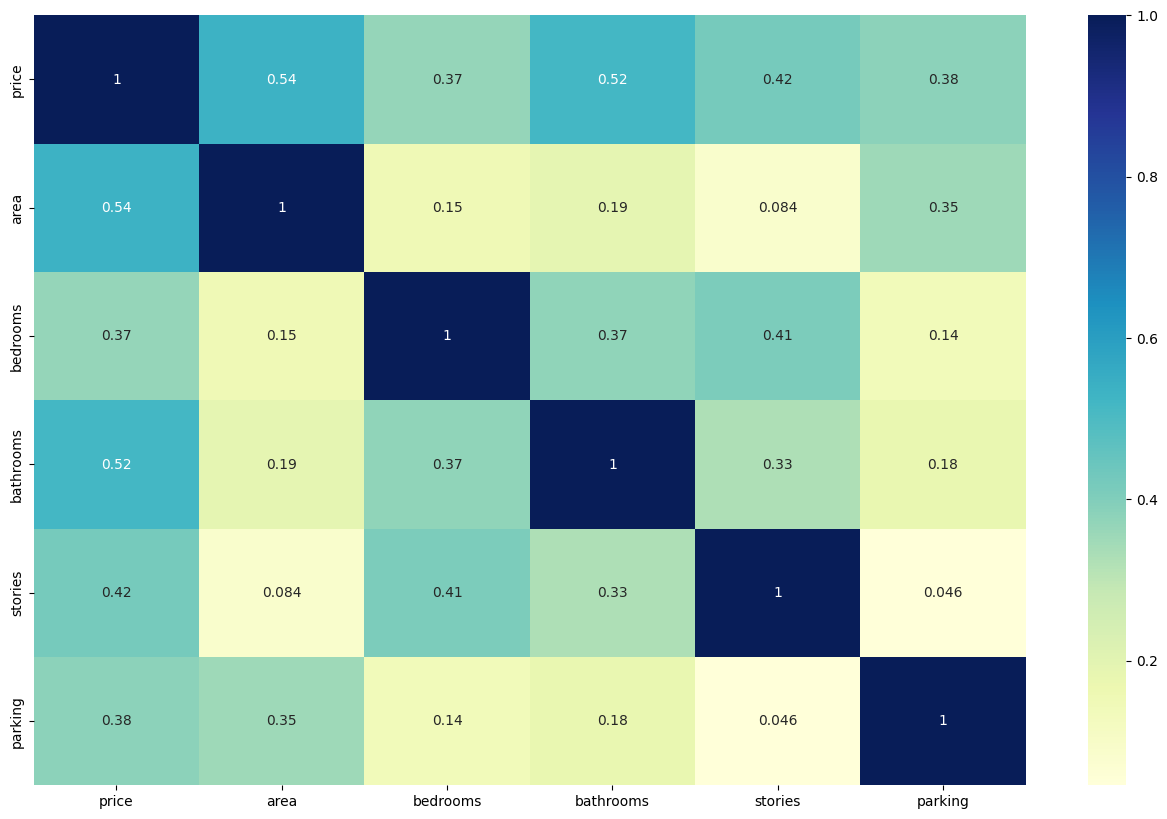

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [20]:
# corr - 0 to 1

In [21]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [22]:
col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

for x in col:
    data[x] = data[x].map(dict({'yes':1,'no':0}))

In [23]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [24]:
data['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [25]:
newdata = pd.get_dummies(data,columns = ['furnishingstatus'], dtype = int)

In [26]:
newdata

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [27]:
# X _ IDV(Indenpendent variables) , y- DV(Dependent Variable)

X = newdata.loc[:,newdata.columns != 'price']
y = newdata[['price']]
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [28]:
# Feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_y=scaler.fit_transform(y)

In [29]:
scaled_y

array([[1.        ],
       [0.90909091],
       [0.90909091],
       [0.90606061],
       [0.83636364],
       [0.78787879],
       [0.72727273],
       [0.72727273],
       [0.7030303 ],
       [0.6969697 ],
       [0.6969697 ],
       [0.68666667],
       [0.65454545],
       [0.64848485],
       [0.64848485],
       [0.63636364],
       [0.63636364],
       [0.62424242],
       [0.61818182],
       [0.61515152],
       [0.60606061],
       [0.6       ],
       [0.5969697 ],
       [0.5969697 ],
       [0.59090909],
       [0.58787879],
       [0.58121212],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.56666667],
       [0.55757576],
       [0.55151515],
       [0.54813333],
       [0.54484848],
       [0.53939394],
       [0.53787879],
       [0.53333333],
       [0.53030303],
       [0.52727273],
       [0.51515152],
       [0.51515152],
       [0.5030303 ],
       [0.5030303 ],
       [0.5       ],
       [0.496

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, scaled_y, random_state=1, test_size = 0.2, train_size = 0.8)

In [33]:
y_train

array([[0.22424242],
       [0.53030303],
       [0.19393939],
       [0.12727273],
       [0.06666667],
       [0.15151515],
       [0.23575758],
       [0.24242424],
       [0.57575758],
       [0.21151515],
       [0.63636364],
       [0.41212121],
       [0.05454545],
       [0.14545455],
       [0.19545455],
       [0.13939394],
       [0.21818182],
       [0.26060606],
       [0.38484848],
       [0.04545455],
       [0.21151515],
       [0.15454545],
       [0.3569697 ],
       [0.24242424],
       [0.13333333],
       [0.37575758],
       [0.15151515],
       [0.12121212],
       [0.21212121],
       [0.17515152],
       [0.16363636],
       [0.72727273],
       [0.68666667],
       [0.22424242],
       [0.23636364],
       [0.47272727],
       [0.07878788],
       [0.32121212],
       [0.22424242],
       [0.11575758],
       [0.38787879],
       [0.12121212],
       [0.0969697 ],
       [0.21212121],
       [0.21212121],
       [0.61818182],
       [0.21212121],
       [0.363

In [34]:
from sklearn.linear_model import LinearRegression
Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
#Train score
Linear_reg.score(X_train,y_train)

0.6956853961843783

In [36]:
#Test score
Linear_reg.score(X_test,y_test)

0.6221280430074472

In [94]:
# New Data prediction

In [95]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
62,6240,4,2,2,1,0,0,0,1,1,0,1,0,0
247,8400,4,1,4,1,0,0,0,0,3,0,0,0,1
142,10500,4,2,2,1,0,0,0,0,1,0,0,1,0
107,6420,3,1,3,1,0,1,0,0,0,1,0,0,1
483,6615,3,1,2,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,4095,3,1,2,0,1,1,0,1,0,0,0,1,0
92,4800,3,2,4,1,1,0,0,1,0,0,1,0,0
66,13200,2,1,1,1,0,1,1,0,1,0,1,0,0
284,7770,2,1,1,1,0,0,0,0,1,0,1,0,0


In [37]:
y_predict=Linear_reg.predict(X_test)

In [39]:
y_predict

array([[0.39440846],
       [0.3864808 ],
       [0.41584202],
       [0.32130992],
       [0.21653204],
       [0.10484361],
       [0.08434302],
       [0.48610743],
       [0.05620395],
       [0.24237716],
       [0.17303466],
       [0.15976506],
       [0.2536994 ],
       [0.25847711],
       [0.3039538 ],
       [0.53528978],
       [0.22258432],
       [0.15362455],
       [0.43551768],
       [0.07864539],
       [0.24701107],
       [0.30638917],
       [0.29984394],
       [0.15154807],
       [0.30808955],
       [0.45110724],
       [0.08807863],
       [0.48190412],
       [0.5080165 ],
       [0.22643248],
       [0.50325163],
       [0.41886764],
       [0.27776947],
       [0.2380759 ],
       [0.37155051],
       [0.25415666],
       [0.40927579],
       [0.14032642],
       [0.28902372],
       [0.33999592],
       [0.19647211],
       [0.13860757],
       [0.16179246],
       [0.24918678],
       [0.39441168],
       [0.13455603],
       [0.26570219],
       [0.079

In [40]:
y_pred=pd.DataFrame(Linear_reg.predict(X_test))

In [41]:
y_pred

,0
0,0.394408
1,0.386481
2,0.415842
3,0.321310
4,0.216532
...,...
104,0.257032
105,0.448068
106,0.451356
107,0.218707


In [42]:
y_predict = pd.DataFrame(scaler.inverse_transform(y_pred), columns=['Predicted_house_price'], dtype=int).reset_index(drop=True)


<ipython-input-42-60ecbfd114cc>:1: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  y_predict = pd.DataFrame(scaler.inverse_transform(y_pred), columns=['Predicted_house_price'], dtype=int).reset_index(drop=True)


In [43]:
y_predict

,Predicted_house_price
0,6305417
1,6213853
2,6552975
3,5461129
4,4250945
...,...
104,4718713
105,6925181
106,6963166
107,4276064


In [44]:
y_Actual=pd.DataFrame(scaler.inverse_transform(pd.DataFrame(y_test)),columns=['y_Actual'],dtype=int).reset_index(drop=True)

<ipython-input-44-fa38759aa6c7>:1: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  y_Actual=pd.DataFrame(scaler.inverse_transform(pd.DataFrame(y_test)),columns=['y_Actual'],dtype=int).reset_index(drop=True)


In [45]:
result = pd.merge(y_Actual, y_predict, left_index=True, right_index=True)


In [46]:
result

,y_Actual,Predicted_house_price
0,7070000,6305417
1,4550000,6213853
2,5599999,6552975
3,6125000,5461129
4,2940000,4250945
...,...,...
104,4900000,4718713
105,6405000,6925181
106,6930000,6963166
107,4270000,4276064


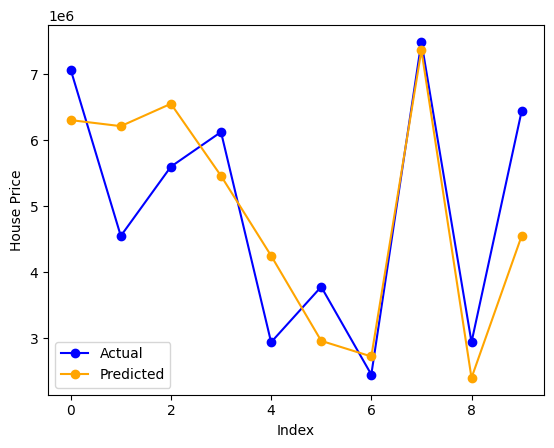

In [47]:
plt.plot(result.index[:10], result['y_Actual'][:10], label='Actual', color='blue', marker='o')
plt.plot(result.index[:10], result['Predicted_house_price'][:10], label='Predicted', color='orange', marker='o')

plt.xlabel('Index')
plt.ylabel('House Price')
plt.legend()
plt.show()

In [121]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(result['y_Actual'],result['Predicted_house_price'])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 1580982519785.6055
Root Mean Squared Error (RMSE): 1257371.2736441873
